# Reading in the data

In [107]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

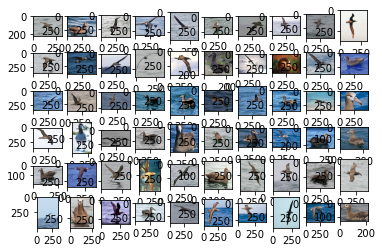

In [94]:

src = './../CUB_200_2011/images/001.Black_footed_Albatross/' # Images source

files = os.listdir(src) # Getting the files to copy

for idx, image_src in enumerate(files):
    
    image = Image.open(f'{src}{image_src}')  
    plt.subplot(6, 10, idx+1), plt.imshow(image) #6 x 10 because there are 60 images

plt.show()


In [181]:


src = './../CUB_200_2011/images/001.Black_footed_Albatross/' # Images source

files = os.listdir(src) # Getting the files to copy
arrays_empty=[]
for idx, image_src in enumerate(files):
    images = Image.open(f'{src}{image_src}')  
    arrays1 = np.asarray(images)
    arrays_empty.append(arrays1)
arrays_empty[59]

array([[[155, 156, 161],
        [153, 154, 159],
        [151, 152, 157],
        ...,
        [140, 139, 145],
        [137, 136, 142],
        [135, 134, 140]],

       [[139, 140, 145],
        [139, 140, 145],
        [139, 140, 145],
        ...,
        [143, 142, 148],
        [143, 142, 148],
        [143, 142, 148]],

       [[138, 139, 144],
        [137, 138, 143],
        [136, 137, 142],
        ...,
        [152, 151, 157],
        [154, 153, 159],
        [154, 153, 159]],

       ...,

       [[142, 145, 152],
        [120, 123, 130],
        [100, 103, 110],
        ...,
        [128, 129, 134],
        [114, 115, 120],
        [ 79,  80,  85]],

       [[ 98, 103, 109],
        [ 94,  99, 105],
        [107, 112, 118],
        ...,
        [ 87,  88,  93],
        [ 78,  79,  84],
        [ 91,  92,  97]],

       [[ 99, 104, 110],
        [ 93,  98, 104],
        [ 96, 101, 107],
        ...,
        [142, 143, 148],
        [161, 162, 167],
        [148, 149, 154]]

In [183]:

# <class 'numpy.ndarray'>
print(type(arrays_empty))
print(type(arrays_empty[0]))
#  shape
print(arrays_empty[1].shape)


<class 'list'>
<class 'numpy.ndarray'>
(347, 500, 3)


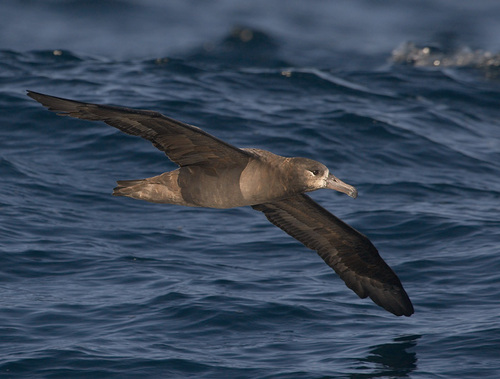

In [104]:
image_test = Image.fromarray(arrays_empty[25])
image_test

In [157]:
npa = np.asarray([arrays_empty])
npa.dtype

dtype('O')

In [159]:
arrays_empty[1].dtype

dtype('uint8')

In [139]:
# try a dummy group
X_train=arrays_empty[:45]
X_test=arrays_empty[45:61]
y_train=[1]*45
y_test=[0]*15

In [140]:
len(X_train)

45

In [141]:
len(y_train)

45

In [142]:
len(X_test)

15

In [143]:
len(y_test)

15

In [145]:
data=(X_train, y_train), (X_test, y_test)

In [151]:
arrays_empty.dtype

AttributeError: 'list' object has no attribute 'dtype'

In [175]:
arrays_empty[1].shape

(347, 500, 3)

In [172]:
new_arrays=[]
for i in arrays_empty:
    i.astype('float32')
    i/255.0
    #print(i.dtype) these are uint8
    new_arrays.append(i)
    print(i.shape)
#new_arrays


(223, 320, 3)
(347, 500, 3)
(375, 500, 3)
(335, 500, 3)
(350, 350, 3)
(301, 500, 3)
(357, 500, 3)
(336, 500, 3)
(416, 500, 3)
(380, 331, 3)
(357, 500, 3)
(392, 500, 3)
(338, 500, 3)
(350, 350, 3)
(414, 500, 3)
(208, 250, 3)
(332, 500, 3)
(340, 500, 3)
(383, 500, 3)
(375, 500, 3)
(333, 500, 3)
(375, 500, 3)
(272, 448, 3)
(332, 500, 3)
(500, 500, 3)
(379, 500, 3)
(500, 500, 3)
(356, 500, 3)
(332, 500, 3)
(335, 500, 3)
(360, 500, 3)
(500, 307, 3)
(275, 500, 3)
(391, 500, 3)
(450, 455, 3)
(390, 500, 3)
(337, 500, 3)
(334, 500, 3)
(240, 320, 3)
(187, 240, 3)
(192, 288, 3)
(333, 400, 3)
(350, 350, 3)
(500, 333, 3)
(385, 500, 3)
(200, 200, 3)
(500, 389, 3)
(500, 415, 3)
(441, 500, 3)
(500, 450, 3)
(500, 346, 3)
(359, 260, 3)
(322, 376, 3)
(320, 500, 3)
(375, 500, 3)
(470, 500, 3)
(280, 420, 3)
(400, 335, 3)
(334, 500, 3)
(136, 216, 3)


In [162]:
arrays_empty/255.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [161]:
for i in arrays_empty:
    i /= 255.0


ValueError: output array is read-only

In [146]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.

X_train /= 255.0

X_test /= 255.0

AttributeError: 'list' object has no attribute 'astype'

### Experiment with turning images back/forth into arrays 

In [64]:

#Example image import
  
from PIL import Image
image = Image.open("./../CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg")

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)



JPEG
(320, 223)
RGB


In [32]:
#Example of changing the image into an array

from numpy import asarray
# asarray() class is used to convert PIL images into NumPy arrays
numpydata = asarray(image)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)
numpydata

<class 'numpy.ndarray'>
(223, 320, 3)


array([[[178, 182, 181],
        [177, 181, 180],
        [177, 181, 180],
        ...,
        [173, 179, 177],
        [172, 178, 176],
        [172, 178, 176]],

       [[172, 176, 175],
        [173, 177, 176],
        [173, 177, 176],
        ...,
        [177, 183, 181],
        [177, 183, 181],
        [176, 182, 180]],

       [[170, 174, 173],
        [171, 175, 174],
        [172, 176, 175],
        ...,
        [181, 187, 185],
        [181, 187, 185],
        [182, 188, 186]],

       ...,

       [[157, 163, 161],
        [157, 163, 161],
        [157, 163, 161],
        ...,
        [166, 172, 168],
        [166, 172, 168],
        [166, 172, 168]],

       [[161, 167, 165],
        [160, 166, 164],
        [160, 166, 164],
        ...,
        [164, 170, 166],
        [165, 171, 167],
        [166, 172, 168]],

       [[163, 169, 167],
        [162, 168, 166],
        [161, 167, 165],
        ...,
        [159, 168, 163],
        [160, 169, 164],
        [160, 169, 164]]

<class 'PIL.Image.Image'>
RGB
(320, 223)
<PIL.Image.Image image mode=RGB size=320x223 at 0x1ED2E58A460>


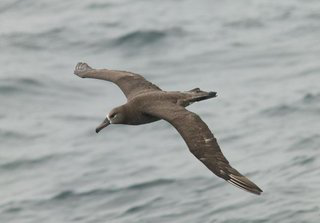

In [4]:
#now get back to the image from our array!

from PIL import Image
pilImage = Image.fromarray(numpydata)
print(type(pilImage))
  
# Let us check  image details
print(pilImage.mode)
print(pilImage.size)
print(pilImage)
pilImage

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


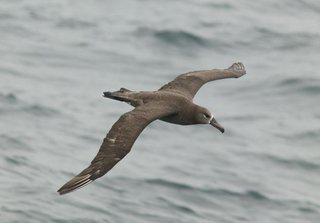

In [10]:
#try flipping the image

example=tf.image.flip_left_right(numpydata)
print(type(example))
#convert the Eager Tensor back into an np array
ex2=np.array(example)
print(type(ex2))
pilImage_flipped = Image.fromarray(ex2)
pilImage_flipped 

<class 'numpy.ndarray'>


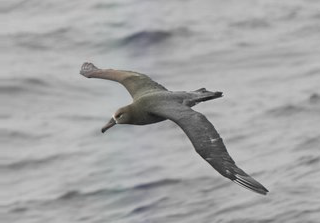

In [30]:
ex_tilt=tf.keras.preprocessing.image.random_rotation(
    x=numpydata, rg=45, row_axis=1, col_axis=2, channel_axis=0, fill_mode='nearest',
    cval=0.0, interpolation_order=1)
print(type(ex_tilt))
pilImage_tilted = Image.fromarray(ex_tilt)
pilImage_tilted

(223, 320, 3)
[[[178 182 181]
  [177 181 180]
  [177 181 180]
  ...
  [173 179 177]
  [172 178 176]
  [172 178 176]]

 [[172 176 175]
  [173 177 176]
  [173 177 176]
  ...
  [177 183 181]
  [177 183 181]
  [176 182 180]]

 [[170 174 173]
  [171 175 174]
  [172 176 175]
  ...
  [181 187 185]
  [181 187 185]
  [182 188 186]]

 ...

 [[157 163 161]
  [157 163 161]
  [157 163 161]
  ...
  [166 172 168]
  [166 172 168]
  [166 172 168]]

 [[161 167 165]
  [160 166 164]
  [160 166 164]
  ...
  [164 170 166]
  [165 171 167]
  [166 172 168]]

 [[163 169 167]
  [162 168 166]
  [161 167 165]
  ...
  [159 168 163]
  [160 169 164]
  [160 169 164]]]


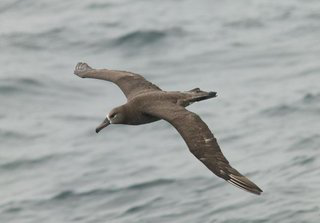

In [110]:
#try this method as an alternative
np_img2 = np.array(image)
  
print(np_img2.shape)
print(np_img2)
pilImage2 = Image.fromarray(np_img2)
pilImage2

In [34]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("./../CUB_200_2011/images/001.Black_footed_Albatross/*.PNG")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

X_data shape: (0,)


In [38]:
files = glob.glob("./../CUB_200_2011/images/*.png")
files

[]

### Load in .txt files from dataset

In [70]:
# Main Directory Files

images= pd.read_csv("./../CUB_200_2011/images.txt", sep=" ", header=None, names=['image_id','image_name'])
train_test_list= pd.read_csv("./../CUB_200_2011/train_test_split.txt", sep=" ", header=None, names=['image_id','is_training_image'])
classes= pd.read_csv("./../CUB_200_2011/classes.txt", sep=" ", header=None, names=['class_id', 'class_name'])
image_class_labels= pd.read_csv("./../CUB_200_2011/image_class_labels.txt", sep=" ", header=None, names=['image_id', 'class_id'])
#bounding boxes in pixels 
bounding_boxes= pd.read_csv("./../CUB_200_2011/bounding_boxes.txt", sep=" ", header=None, names=['image_id','x','y','width','height'])


In [71]:
# Parts Directory Files 

parts= pd.read_csv("./../CUB_200_2011/parts/parts_edited.txt", sep=" ", header=None, names=['part_id','part_name'])
# Part Locs Note: <x> and <y> denote the pixel location of the center of the part.
part_locs= pd.read_csv("./../CUB_200_2011/parts/part_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible'])
part_click_locs= pd.read_csv("./../CUB_200_2011/parts/part_click_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible','time'])


In [85]:
# Attributes Directory Files 
attributes= pd.read_csv("./../CUB_200_2011/attributes/attributes.txt", sep=" ", header=None, names=['attribute_id','attribute_name'])
certainties= pd.read_csv("./../CUB_200_2011/attributes/certainties.txt", sep=" ", header=None, names=['certainty_id','certainty_name'])
image_attribute_labels= pd.read_csv("./../CUB_200_2011/attributes/image_attribute_labels.txt", sep=" ", header=None, names=['image_id','attribute_id','is_present','certainty_id','time'])
class_attribute_labels_continuous= pd.read_csv("./../CUB_200_2011/attributes/class_attribute_labels_continuous.txt", sep=" ", header=None)
# each line corresponds to one class (in the same order as classes)

### Merge Files for Clarity

In [96]:
# Merge Main Files

merged1=pd.merge(images, bounding_boxes, on='image_id', how='left')
merged2=pd.merge(merged1, image_class_labels, on='image_id', how='left')
merged3=pd.merge(merged2, train_test_list, on='image_id', how='left')
merged4=pd.merge(merged3, classes, on='class_id', how='left')

merged4.head(100)

,image_id,image_name,x,y,width,height,class_id,is_training_image,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,60.0,27.0,325.0,304.0,1,0,001.Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,139.0,30.0,153.0,264.0,1,1,001.Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,14.0,112.0,388.0,186.0,1,0,001.Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,112.0,90.0,255.0,242.0,1,1,001.Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,70.0,50.0,134.0,303.0,1,1,001.Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...
95,96,002.Laysan_Albatross/Laysan_Albatross_0076_671...,151.0,23.0,274.0,351.0,2,1,002.Laysan_Albatross
96,97,002.Laysan_Albatross/Laysan_Albatross_0096_673...,46.0,71.0,403.0,280.0,2,1,002.Laysan_Albatross
97,98,002.Laysan_Albatross/Laysan_Albatross_0064_674...,118.0,19.0,222.0,294.0,2,0,002.Laysan_Albatross
98,99,002.Laysan_Albatross/Laysan_Albatross_0039_924...,24.0,53.0,361.0,181.0,2,1,002.Laysan_Albatross


In [91]:

# Merge Attributes by Image

image_attr=pd.merge(image_attribute_labels, attributes, on='attribute_id', how='left')
image_attr

,image_id,attribute_id,is_present,certainty_id,time,attribute_name
0,1,1,0,3,27.708,has_bill_shape::curved_(up_or_down)
1,1,2,0,3,27.708,has_bill_shape::dagger
2,1,3,0,3,27.708,has_bill_shape::hooked
3,1,4,0,3,27.708,has_bill_shape::needle
4,1,5,1,3,27.708,has_bill_shape::hooked_seabird
...,...,...,...,...,...,...
3677851,11788,308,1,4,4.989,has_crown_color::buff
3677852,11788,309,0,4,8.309,has_wing_pattern::solid
3677853,11788,310,0,4,8.309,has_wing_pattern::spotted
3677854,11788,311,0,4,8.309,has_wing_pattern::striped


In [88]:
attributes

,attribute_id,attribute_name
0,1,has_bill_shape::curved_(up_or_down)
1,2,has_bill_shape::dagger
2,3,has_bill_shape::hooked
3,4,has_bill_shape::needle
4,5,has_bill_shape::hooked_seabird
...,...,...
307,308,has_crown_color::buff
308,309,has_wing_pattern::solid
309,310,has_wing_pattern::spotted
310,311,has_wing_pattern::striped


In [86]:
class_attribute_labels_continuous.shape

(200, 312)

In [87]:
#Attributes by classes

#shows rows (classes) and each column is an attribute (cols), number is the % of time that the human thinks the attribute is present for a given class
class_attribute_labels_continuous

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,2.919708,1.459854,0.000000,59.854015,26.277372,3.649635,5.839416,0.000000,1.639344,...,0.000000,0.000000,21.276596,11.347518,2.12766,31.914894,53.571429,5.357143,21.428571,19.642857
1,4.411765,4.411765,2.941176,1.470588,57.352941,27.205882,0.000000,2.205882,0.000000,0.000000,...,0.000000,2.255639,2.255639,94.736842,0.00000,0.000000,77.142857,3.809524,10.476190,8.571429
2,0.000000,3.973510,3.311258,0.000000,70.860927,14.569536,5.298013,1.986755,0.000000,0.000000,...,2.205882,0.000000,38.970588,2.941176,0.00000,16.176471,71.028037,0.934579,7.476636,20.560748
3,0.000000,1.459854,10.218978,0.000000,0.000000,0.000000,8.759124,25.547445,54.014599,5.839416,...,0.000000,0.000000,88.571429,0.000000,0.00000,2.142857,84.126984,2.380952,3.174603,10.317460
4,0.000000,0.000000,3.225806,0.000000,1.075269,0.000000,0.000000,32.258065,63.440860,0.000000,...,0.000000,0.000000,82.727273,5.454545,0.00000,4.545455,88.461538,0.000000,3.846154,7.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.702703,12.837838,0.000000,0.000000,0.000000,0.000000,76.351351,8.108108,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.973684,0.00000,29.605263,14.379085,22.875817,56.209150,6.535948
196,18.300654,11.764706,0.000000,3.267974,0.000000,0.000000,60.784314,5.882353,0.000000,0.000000,...,0.000000,0.000000,35.443038,4.430380,0.00000,22.784810,16.783217,25.174825,32.167832,25.874126
197,10.759494,36.708861,0.000000,7.594937,0.632911,0.000000,43.670886,0.632911,0.000000,0.000000,...,0.000000,0.000000,14.375000,13.125000,0.00000,41.875000,18.791946,44.295302,18.791946,18.120805
198,0.000000,2.068966,0.000000,2.068966,0.000000,0.000000,88.275862,7.586207,0.000000,0.000000,...,0.000000,1.324503,3.973510,0.000000,0.00000,19.205298,12.413793,34.482759,33.103448,20.000000


In [82]:
#attributes by images
image_attribute_labels

,image_id,attribute_id,is_present,certainty_id,time
0,1,1,0,3,27.708
1,1,2,0,3,27.708
2,1,3,0,3,27.708
3,1,4,0,3,27.708
4,1,5,1,3,27.708
...,...,...,...,...,...
3677851,11788,308,1,4,4.989
3677852,11788,309,0,4,8.309
3677853,11788,310,0,4,8.309
3677854,11788,311,0,4,8.309


In [ ]:
merged4=pd.merge(merged3, classes, on='class_num', how='left')

In [37]:
# Merge Main Files

merged1=pd.merge(images, bounding_boxes, on='record_num', how='left')
merged2=pd.merge(merged1, image_class_labels, on='record_num', how='left')
merged3=pd.merge(merged2, train_test_list, on='record_num', how='left')
merged4=pd.merge(merged3, classes, on='class_num', how='left')

merged4.isnull().sum()

record_num    0
image_name    0
b1            0
b2            0
b3            0
b4            0
class_num     0
test_ind      0
bird_class    0
dtype: int64

In [31]:
bounding_boxes.shape

(11788, 5)

In [22]:
train_test_list.shape

(11788, 2)

In [23]:
classes.shape

(200, 2)

In [24]:
images.shape

(11788, 2)

In [25]:
image_class_labels.shape

(11788, 2)

In [30]:
bounding_boxes.head()

,record_num,b1,b2,b3,b4
0,1,60.0,27.0,325.0,304.0
1,2,139.0,30.0,153.0,264.0
2,3,14.0,112.0,388.0,186.0
3,4,112.0,90.0,255.0,242.0
4,5,70.0,50.0,134.0,303.0


In [27]:
train_test_list['test_ind'].value_counts(normalize=True)

1    0.508483
0    0.491517
Name: test_ind, dtype: float64

In [14]:
classes.head()

,index_num,bird_class
0,1,001.Black_footed_Albatross
1,2,002.Laysan_Albatross
2,3,003.Sooty_Albatross
3,4,004.Groove_billed_Ani
4,5,005.Crested_Auklet


In [26]:


path="./../CUB_200_2011/images"
img_name = sorted(os.listdir("./../CUB_200_2011/images/001.Black_footed_Albatross"))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
img_name

['Black_Footed_Albatross_0001_796111.jpg',
 'Black_Footed_Albatross_0002_55.jpg',
 'Black_Footed_Albatross_0003_796136.jpg',
 'Black_Footed_Albatross_0005_796090.jpg',
 'Black_Footed_Albatross_0006_796065.jpg',
 'Black_Footed_Albatross_0007_796138.jpg',
 'Black_Footed_Albatross_0008_796083.jpg',
 'Black_Footed_Albatross_0009_34.jpg',
 'Black_Footed_Albatross_0010_796097.jpg',
 'Black_Footed_Albatross_0014_89.jpg',
 'Black_Footed_Albatross_0016_796067.jpg',
 'Black_Footed_Albatross_0017_796098.jpg',
 'Black_Footed_Albatross_0019_796104.jpg',
 'Black_Footed_Albatross_0023_796059.jpg',
 'Black_Footed_Albatross_0024_796089.jpg',
 'Black_Footed_Albatross_0025_796057.jpg',
 'Black_Footed_Albatross_0026_796095.jpg',
 'Black_Footed_Albatross_0031_100.jpg',
 'Black_Footed_Albatross_0032_796115.jpg',
 'Black_Footed_Albatross_0033_796086.jpg',
 'Black_Footed_Albatross_0035_796140.jpg',
 'Black_Footed_Albatross_0036_796127.jpg',
 'Black_Footed_Albatross_0037_796120.jpg',
 'Black_Footed_Albatross_0

In [28]:
path="./../CUB_200_2011/images/"
img_folder_list = sorted(os.listdir("./../CUB_200_2011/images/"))
img_folders = []
for i in img_folder_list:
    img_folders.append(path + i)

In [ ]:
# try a more advanced one
path="./../CUB_200_2011/images/"
img_folder_list = sorted(os.listdir("./../CUB_200_2011/images/"))
img_folders = []
for i in img_folder_list:
    img_folders.append(path + i)



In [32]:

img_path = []
for i in img_folders:
    img_path.append(path + i)

In [33]:
img_path

['./../CUB_200_2011/images/./../CUB_200_2011/images/001.Black_footed_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/002.Laysan_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/003.Sooty_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/004.Groove_billed_Ani',
 './../CUB_200_2011/images/./../CUB_200_2011/images/005.Crested_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/006.Least_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/007.Parakeet_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/008.Rhinoceros_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/009.Brewer_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/010.Red_winged_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/011.Rusty_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/012.Yellow_headed_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/013.Bobolink',
 './../CUB_200_2011/ima

In [30]:
img_paths

['./../CUB_200_2011/imagesBlack_Footed_Albatross_0001_796111.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0002_55.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0003_796136.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0005_796090.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0006_796065.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0007_796138.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0008_796083.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0009_34.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0010_796097.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0014_89.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0016_796067.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0017_796098.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0019_796104.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0023_796059.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0024_796089.jpg',
 './../

In [13]:
tfds.folder_dataset.ImageFolder(root_dir:"./../CUB_200_2011/images/001.Black_footed_Albatross",
    *,
    shape: Optional[type_utils.Shape] = None,
    dtype: Optional[tf.DType] = None
)

SyntaxError: invalid syntax (<ipython-input-13-acd2d722e564>, line 1)

In [15]:
builder = tfds.ImageFolder("./../CUB_200_2011/images/001.Black_footed_Albatross")
print(builder.info)  # num examples, labels... are automatically calculated
#ds = builder.as_dataset(split='train', shuffle_files=True)
#tfds.show_examples(ds, builder.info) 

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='./../CUB_200_2011/images/001.Black_footed_Albatross',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=0),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""""",
)


In [16]:
builder